# Pymaceuticals Inc.
---

### Analysis

1. Maximum number of mouse is involved in Drug Capomulin that is 230. Lowest number of mouse is with Drug Propriva
2. The correlation co-efficient between mouse weight and average tumor volume is 0.84 , which is positive correlation that is when the mouse weight increases the average tumor volume also increases.
3. The observed SEM, Variance and Standard devaition is least for Ramicane  as compared with other drug regime- which signifies more relaibility,it suggests that the measurements for Ramicane are less variable and more consistent than those for other drugs. This can have implications for the reliability and precision of the data.
 

In [451]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df=pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [452]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [453]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Getting the dupliated mouse ID
duplicate_df = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse=duplicate_df["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [454]:
# Optional: Get all the data for the duplicate mouse ID.

#extracting all rows for dupliate mouse
optional_df=merged_df.loc[merged_df["Mouse ID"]=="g989",:]
optional_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [455]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
df.sample(5)
df.to_excel("output.xlsx", index=True, header=True)

In [456]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].unique())

248

## Summary Statistics

In [457]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Grouping the Drug name and tumour volume to calculate the summary statistics
tumor_vol=df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = round(tumor_vol.mean(),3)
median = round(tumor_vol.median(),3)
var = round(tumor_vol.var(),3)
std = round(tumor_vol.std(),3)
sem = round(tumor_vol.sem(),3)

tumor_vol_summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem
})
tumor_vol_summary                           #summary statistics dataframe drug regime wise

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [458]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

#Calculation summary statistics using aggregate function
tumor_vol_summary_aggregate = round(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']),3)
tumor_vol_summary_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

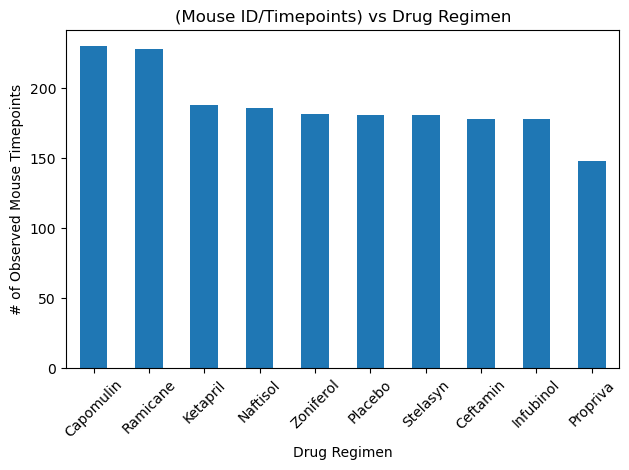

In [459]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Grouping the drug regime with timepoints for graph
graph=df.groupby("Drug Regimen")["Timepoint"].count()
graph = graph1.sort_values(ascending=False)                    #sorting the above value in descending order for clear graph visualization

#plotting bar graph for Mouse ID/Timepoints vs Drug Regimen
bar_graph1 = graph.plot(kind="bar", title="(Mouse ID/Timepoints) vs Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

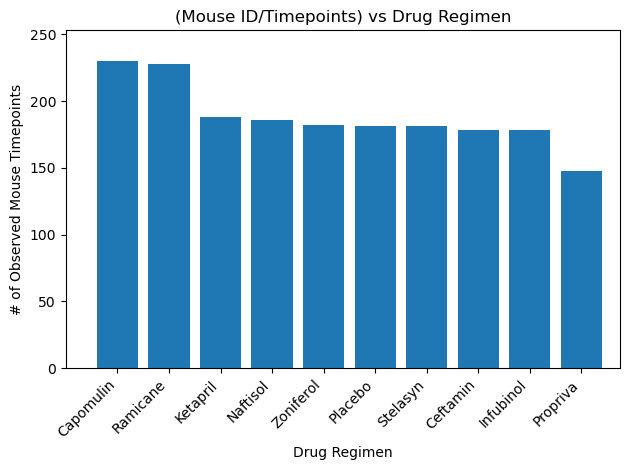

In [460]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Same graph as above-using pyplot method
x_axis_alpha=graph.index
y_axis=graph.values
x_axis=list(range(len(y_axis)))
plt.bar(x_axis,y_axis,align="center")
plt.xlim(-1,len(y_axis)-0.25)
plt.ylim(0,1.1*max(y_axis))
plt.xticks(x_axis,x_axis_alpha,rotation=45,ha="right",fontsize=10)
plt.title('(Mouse ID/Timepoints) vs Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

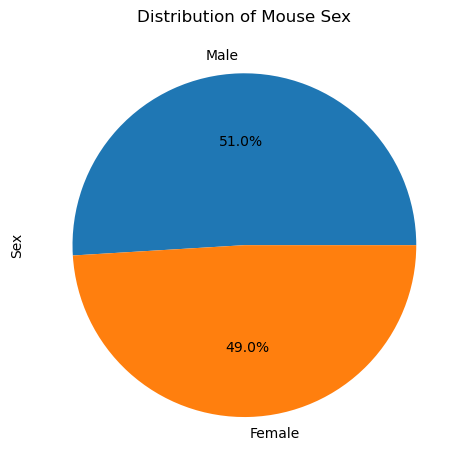

In [461]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
graph2=df["Sex"].value_counts()            # Calculating number of males and females
pie_graph1=graph2.plot(kind="pie",autopct="%1.1f%%",ylabel="Sex")
plt.title('Distribution of Mouse Sex')
plt.tight_layout()
plt.show()

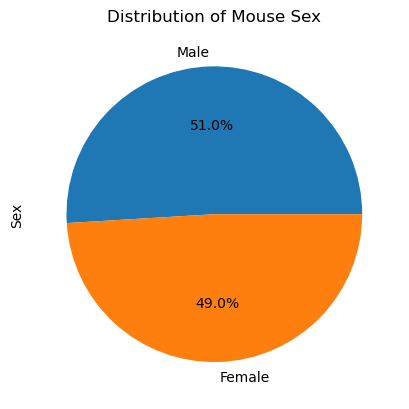

In [462]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = graph2.values.tolist()
pie_graph2 = plt.pie(sizes,labels=labels, autopct="%1.1f%%")
plt.title('Distribution of Mouse Sex')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [463]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


#Creating a list for slected drugs
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating an empty DataFrame to store the results
max_tumor_volume_df = pd.DataFrame(columns=["Drug", "Mouse ID", "Max Tumor Volume"])

# Iterating through each drug in the list
for drug in drug_list:
    
    # Filtering the DataFrame for the current drug and the maximum timepoint for each mouse
    max_volume = df.loc[(df["Drug Regimen"] == drug) & (df["Timepoint"] == df.groupby("Mouse ID")["Timepoint"].transform("max")),:]
    

    # Extracting relevant columns and add a column to store the drug name
    max_volume_per_mouse = max_volume[["Mouse ID", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Max Tumor Volume"})
    max_volume_per_mouse["Drug"] = drug
    
    #Concatenate the results to the final DataFrame
    max_tumor_volume_df = pd.concat([max_tumor_volume_df, max_volume_per_mouse])

# Display the final DataFrame
max_tumor_volume_df=max_tumor_volume_df.rename(columns={"Drug":"Drug Regimen"})

#Merging thie above DataFrame  with the original DataFrame to get the tumor volume at the last timepoint
new_combined = pd.merge(df, max_tumor_volume_df, on="Mouse ID", how="inner", suffixes=('', '_max_tumor'))
new_combined.drop(columns='Drug Regimen_max_tumor', inplace=True)
new_combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [464]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
# Determine outliers using upper and lower bounds

tumor_vol = []

#Iterating through each drug list, to calcuate the IQR and outliers
for drug in drug_list:
    drug_data = new_combined.loc[new_combined["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    lower_q = drug_data.quantile(0.25)       #lower quartile
    upper_q = drug_data.quantile(0.75)       #upper quartile
    iqr = upper_q - lower_q                  #Inter quartile range
    lower_bound = lower_q - (1.5 * iqr)      
    upper_bound = upper_q + (1.5 * iqr)
    
    #Calculating outliers
    outliers = new_combined.loc[(new_combined["Drug Regimen"] == drug) & 
                                ((new_combined["Tumor Volume (mm3)"] < lower_bound) | 
                                 (new_combined["Tumor Volume (mm3)"] > upper_bound)),
                                "Tumor Volume (mm3)"]
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lower_q}")
    print(f"The upper quartile of {drug} treatments is: {upper_q}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"Potential outliers for {drug}: {outliers.tolist()}")
    print(f"------------------------------------------------------------")
# Concatenate the list of DataFrames into a single DataFrame
    tumor_vol.append({
        "Drug": drug,
        "Lower Quartile": lower_q,
        "Upper Quartile": upper_q,
        "Interquartile Range": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    
    })
# Creating a DataFrame from the list of results
tumor_vol = pd.DataFrame(tumor_vol)

# Displaying the results DataFrame
tumor_vol
    



------------------------------------------------------------
The lower quartile of Capomulin treatments is: 37.685932865
The upper quartile of Capomulin treatments is: 45.0
The interquartile range of Capomulin treatments is: 7.314067135000002
Values below 26.714832162499995 could be Capomulin outliers.
Values above 55.9711007025 could be Capomulin outliers.
Potential outliers for Capomulin: [25.47214326, 23.34359787]
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 36.674634585
The upper quartile of Ramicane treatments is: 45.0
The interquartile range of Ramicane treatments is: 8.325365415
Values below 24.1865864625 could be Ramicane outliers.
Values above 57.488048122500004 could be Ramicane outliers.
Potential outliers for Ramicane: [22.05012627]
------------------------------------------------------------
------------------------------------------------------------


,Drug,Lower Quartile,Upper Quartile,Interquartile Range,Lower Bound,Upper Bound
0,Capomulin,37.685933,45.000000,7.314067,26.714832,55.971101
1,Ramicane,36.674635,45.000000,8.325365,24.186586,57.488048
2,Infubinol,47.312353,57.314444,10.002091,32.309217,72.317580
3,Ceftamin,47.208427,56.801438,9.593010,32.818911,71.190953


In [465]:
#Calculating the tumour volume dataframe for each drug regime

Capomulin_tumors = df.loc[df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
Ramicane_tumors = df.loc[df["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
Infubinol_tumors = df.loc[df["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
Ceftamin_tumors = df.loc[df["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

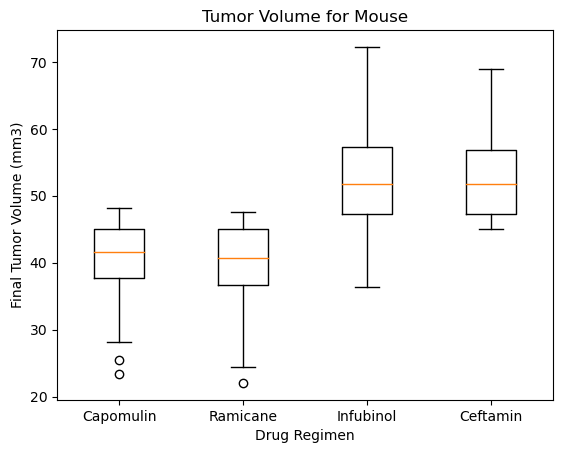

In [466]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
boxplot_graph3= ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

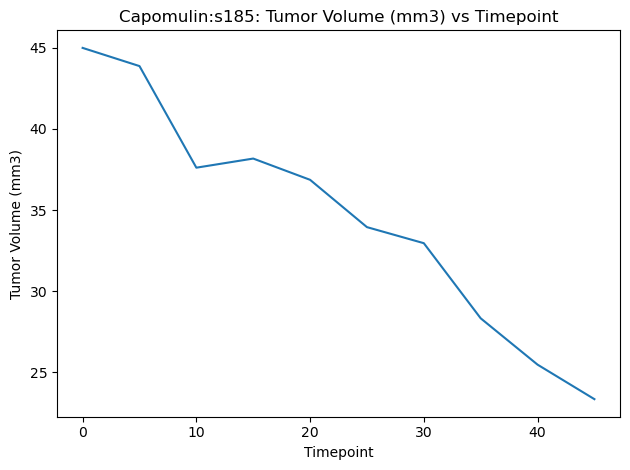

In [467]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#using mouse id s185 to generate the line plot
single_mice = df.loc[(df["Drug Regimen"] == "Capomulin") & (df["Mouse ID"] == "s185"), :]
x_axis=single_mice["Timepoint"]
y_axis=single_mice["Tumor Volume (mm3)"]
lineplot_graph5=plt.plot(x_axis,y_axis)
plt.title("Capomulin:s185: Tumor Volume (mm3) vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

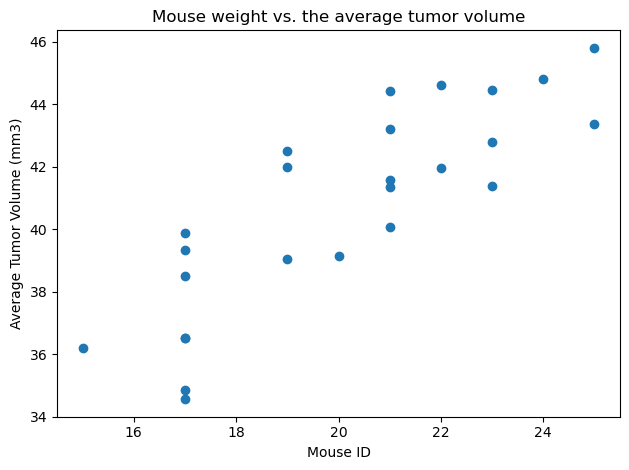

In [468]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Creating a dataframe for drug Capomulin
Capomulin_df = df[df["Drug Regimen"] == "Capomulin"]

#Calculating the avearge weight and tumor volume for each mouse in Capomulin dataframe
average_per_mouse = pd.DataFrame(Capomulin_df.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()).reset_index()

#Creating scatter plot
scatter_graph6=plt.scatter(average_per_mouse["Weight (g)"], average_per_mouse["Tumor Volume (mm3)"])
plt.title("Mouse weight vs. the average tumor volume")
plt.xlabel("Mouse ID")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
y = 0.95 x + 21.55


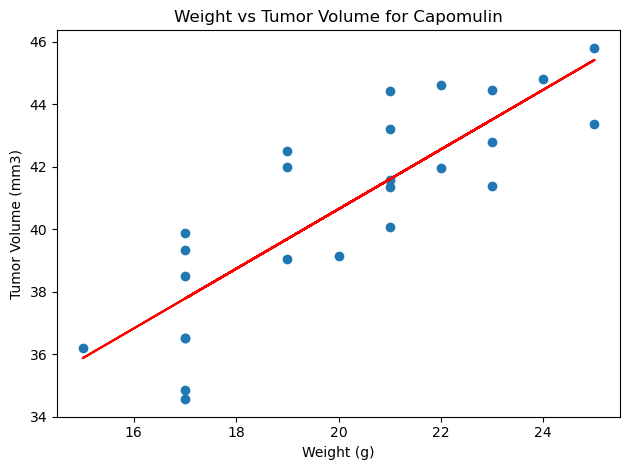

In [469]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
co_rel = st.pearsonr(average_per_mouse['Weight (g)'],average_per_mouse['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(co_rel[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)= linregress(average_per_mouse["Weight (g)"],average_per_mouse["Tumor Volume (mm3)"])
reg_val=average_per_mouse["Weight (g)"]* slope + intercept
line_eqn= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(line_eqn)
plt.scatter(average_per_mouse["Weight (g)"],average_per_mouse["Tumor Volume (mm3)"])
plt.plot(average_per_mouse["Weight (g)"], reg_val, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.tight_layout()
plt.show()